# Exercícios - Estatística I

### Questão 1

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Calcule a frequência absoluta para os sobreviventes no _Titanic_.

__Dica.:__ Utilize a função `.value_counts()`

Carregando as principais bibliotecas que iremos utilizar:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('titanic')

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [64]:
# Cálculo da frequência absoluta
fi = df.value_counts('alive')
fi

alive
no     549
yes    342
dtype: int64

### Questão 2

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Calcule a frequência relativa, relativa percentual e acumulativa para os sobreviventes no _Titanic_.

__Dica.:__ Utilize a função `.value_counts()`

In [65]:
# Cálculo da frequência relativa

fri = fi / df['alive'].count()

# Cálculo da frequência relativa percentual

fri_porc = fri*100

# Cálculo da frequência acumulativa

freq_cum1 = fri.cumsum()

display(fri, fri_porc, freq_cum1)



alive
no     0.616162
yes    0.383838
dtype: float64

alive
no     61.616162
yes    38.383838
dtype: float64

alive
no     0.616162
yes    1.000000
dtype: float64

### Questão 3

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Utilizando a coluna `Age` do _dataset Titanic_, defina as principais métricas estatísticas para essa variável tais como:
- Média;
- Desvio Padrão;
- Mínimo;
- Primeiro Quartil;
- Segundo Quartil (Mediana);
- Terceiro Quartil;
- Distância Interquartil (IQR);
- Máximo;
- Skewness;
- Moda.

In [ ]:
# Informações gerais
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [3]:
# Cálculo da distância interquartil (IQR)
col = df['age'].dropna()
iqr = np.quantile(col, 0.75) - np.quantile(col, 0.25)
iqr

17.875

In [42]:
# Cálculo da moda
col = df['age'].dropna()
moda = col.mode()[0]
moda

24.0

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


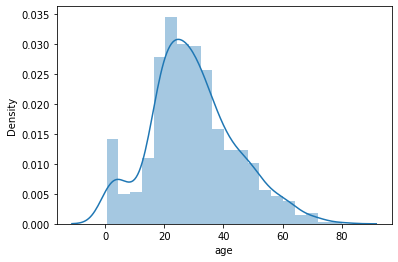

In [ ]:
sns.distplot(df['age'])
plt.show()

In [41]:
# Cálculo SKEWNESS
skewness = df['age'].skew()
skewness

# Valor de skew > 0, o que indica leve assimetria à direita (Positiva), neste caso: média > mediana > moda.

0.38910778230082704

### Questão 4

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Crie um gráfico da dispersão das idades dos passageiros do _Titanic_ e identifique os pontos onde se encontram a média, mediana e moda das idades.

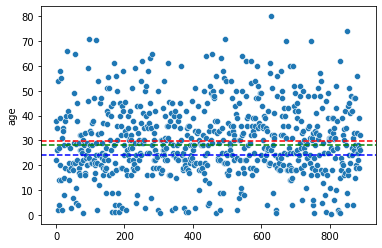

In [11]:
sns.scatterplot(data=df['age'])

mean = np.mean(col)
median = np.median(col)
mode = np.array(moda)

plt.axhline(mean, color='r', linestyle='--', label='Mean')
plt.axhline(median, color='g', linestyle='--', label='Median')
plt.axhline(mode, color='b', linestyle='--', label='Mode')

plt.show()

### Questão 5

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Ainda trabalhando com os valores das idades crie três _Boxplots_:
- _Boxplot_ das idades para todos os passageiros;
- _Boxplot_ das idades dos passageiros separados pelo sexo.
- _Boxplot_ das idades dos passageiros separados pelo sexo e por sobreviventes.

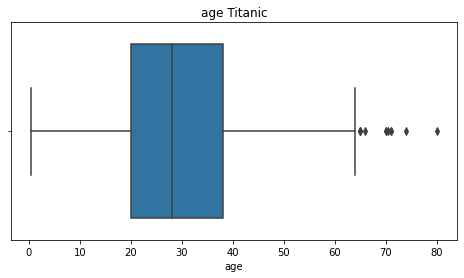

In [14]:
#boxplot com as idades de todos os passageiros
plt.figure(figsize=(8, 4))

sns.boxplot(x="age", data=df)

plt.title('age Titanic')
plt.xlabel('age')

plt.show()

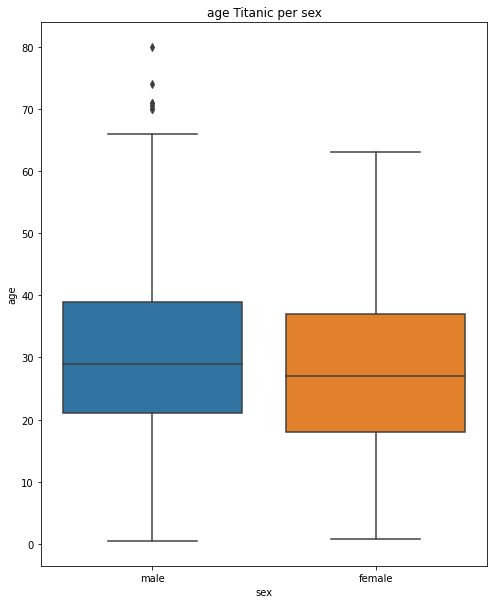

In [58]:
#boxplot de idades para passageiros por sexo

plt.figure(figsize=(8, 10))

sns.boxplot(x="sex", y="age", data=df)

# set plot title and x-label
plt.title('age Titanic per sex')
plt.xlabel('sex')
plt.ylabel('age')

# display the plot
plt.show()

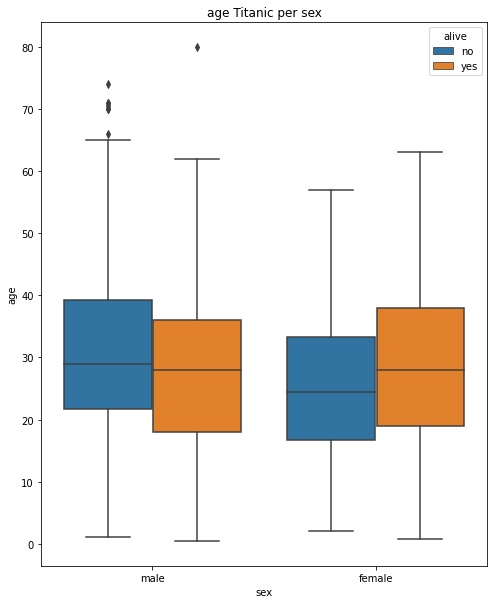

In [60]:
#boxplot de idades para passageiros por sexo e sobreviventes

plt.figure(figsize=(8, 10))

sns.boxplot(x="sex", y="age", hue="alive", data=df)

# set plot title and x-label
plt.title('age Titanic per sex')
plt.xlabel('sex')
plt.ylabel('age')

# display the plot
plt.show()

Com o dataset `penguins`, responda as questões abaixo:

sns.load_dataset('penguins')

### Questão 6

Classifique o tipo de dado de cada coluna

In [28]:
df2 = sns.load_dataset('penguins')
df2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [30]:
df2.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

### Questão 7
Calcule a frequência absoluta para cada espécie de pinguim

In [33]:
fi2 = df2['species'].value_counts()
display(fi2)

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

### Questão 8
Calcule a frequência relativa, relativa percentual e acumulativa para os sobreviventes no Titanic

In [63]:
# Frequência relativa
fir2 = fi2 / df2['species'].count()

# Frequência relativa percentual
fir2_p = fir2 * 100

# Frequência acumulativa
freq_cum = fir2.cumsum()

display(fir2, fir2_p, freq_cum)

Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: species, dtype: float64

Adelie       44.186047
Gentoo       36.046512
Chinstrap    19.767442
Name: species, dtype: float64

Adelie       0.441860
Gentoo       0.802326
Chinstrap    1.000000
Name: species, dtype: float64

### Questão 9
Utilizando a coluna `body_mass_g` do dataset Penguins, defina as principais métricas estatísticas para essa variável tais como:

- Média;
- Desvio Padrão;
- Mínimo;
- Primeiro Quartil;
- Segundo Quartil (Mediana);
- Terceiro Quartil;
- Distância Interquartil (IQR);
- Máximo;
- Skewness;
- Moda.

In [37]:
df2.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [38]:
# Cálculo distância interquartil (IQR)
col2 = df2['body_mass_g'].dropna()
iqr2 = np.quantile(col2, 0.75) - np.quantile(col2, 0.25)
iqr2

1200.0

In [40]:
# Cálculo da moda
moda2 = col2.mode()[0]
moda2

3800.0

In [43]:
# Cálculo do skewness
skewness2 = df2['body_mass_g'].skew()
skewness2

# Também enviesado à direita, positivamente, media > mediana > moda.

0.470329330480123

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


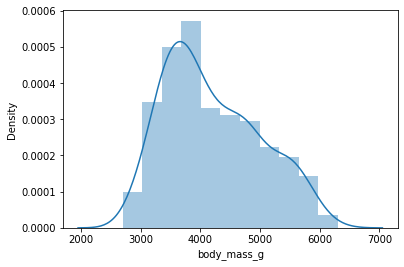

In [44]:
sns.distplot(df2['body_mass_g'])
plt.show()

### Questão 10
Crie um gráfico da dispersão da massa dos pinguins e identifique os pontos onde se encontram a média, mediana e moda das idades.

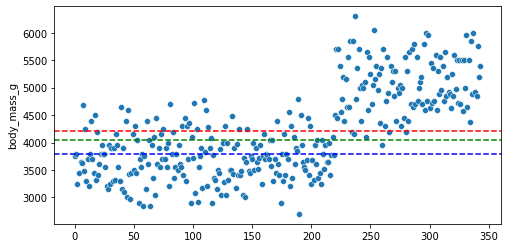

In [48]:
# Tamanho da figura
plt.figure(figsize=(8,4))

# Plotagem do gráfico
sns.scatterplot(data=df2['body_mass_g'])

# Parâmetros estatísticos
mean2 = np.mean(col2)
median2 = np.median(col2)
mode2 = np.array(moda2)

plt.axhline(mean2, color='r', linestyle='--', label='Mean')
plt.axhline(median2, color='g', linestyle='--', label='Median')
plt.axhline(mode2, color='b', linestyle='--', label='Mode')

plt.show()

### Questão 11
Ainda trabalhando com os valores das massas dos pinguins crie três Boxplots:

- Boxplot das massas para todos os pinguins
- Boxplot das massas dos pinguins separados pelo sexo.
- Boxplot das massas dos pinguins separados pelo sexo e pela espécies.

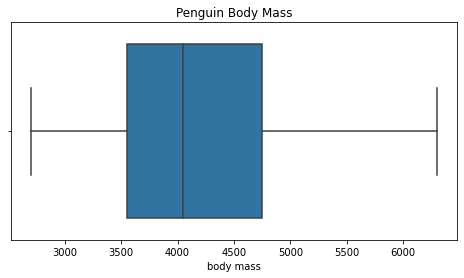

In [50]:
#boxplot com as massas de todos os pinguins
plt.figure(figsize=(8, 4))

sns.boxplot(x="body_mass_g", data=df2)

plt.title('Penguin Body Mass')
plt.xlabel('body mass')

plt.show()

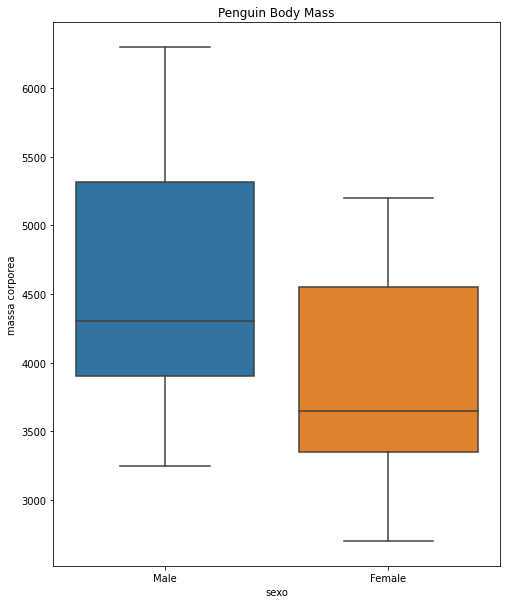

In [54]:
#boxplot com as massas de todos os pinguins separados pelo sexo
plt.figure(figsize=(8, 10))

sns.boxplot(x="sex", y="body_mass_g", data=df2)

plt.title('Penguin Body Mass')
plt.xlabel('sexo')
plt.ylabel('massa corporea')

plt.show()

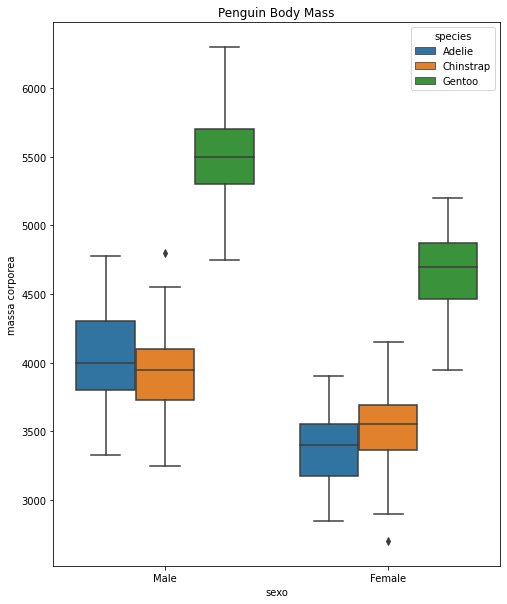

In [55]:
#boxplot com as massas de todos os pinguins separados pelo sexo
plt.figure(figsize=(8, 10))

sns.boxplot(x="sex", y="body_mass_g", hue="species", data=df2)

plt.title('Penguin Body Mass')
plt.xlabel('sexo')
plt.ylabel('massa corporea')

plt.show()